In [19]:
import treelib
from treelib import Node, Tree
from datetime import datetime

In [6]:
tree = Tree()

tree.create_node("Harry", "harry")  # No parent means its the root node
tree.create_node("Jane",  "jane"   , parent="harry")
tree.create_node("Bill",  "bill"   , parent="harry")
tree.create_node("Diane", "diane"  , parent="jane")
tree.create_node("Mary",  "mary"   , parent="diane")
tree.create_node("Mark",  "mark"   , parent="jane")

tree.show()

Harry
├── Bill
└── Jane
    ├── Diane
    │   └── Mary
    └── Mark



visualize a bar set to a tree

In [12]:
bar_list = [(('2024-02-01', 186.86), ('2024-02-02', 185.85)),
 (('2024-02-09', 188.85), ('2024-02-08', 188.32)),
 (('2024-02-22', 184.37), ('2024-02-20', 181.56)),
 (('2024-02-27', 182.63), ('2024-02-26', 181.16)),
 (('2024-02-07', 189.41), ('2024-02-29', 180.75))]

In [9]:
print(bar_list[0])
print(bar_list[1])
print(bar_list[2])

(('2024-04-03', 169.65), ('2024-04-02', 168.84))
(('2024-04-05', 169.58), ('2024-04-04', 168.82))
(('2024-04-09', 169.67), ('2024-04-08', 168.45))


In [110]:
def tidy_bars_step1(bar_list):
    bar_list_new = []
    for bar in bar_list:
        bar_list_new.append((bar[1][0], bar[1][1], bar[0][0], bar[0][1]))
    return bar_list_new
        


In [15]:
bar_list_new = tidy_bars_step1(bar_list)

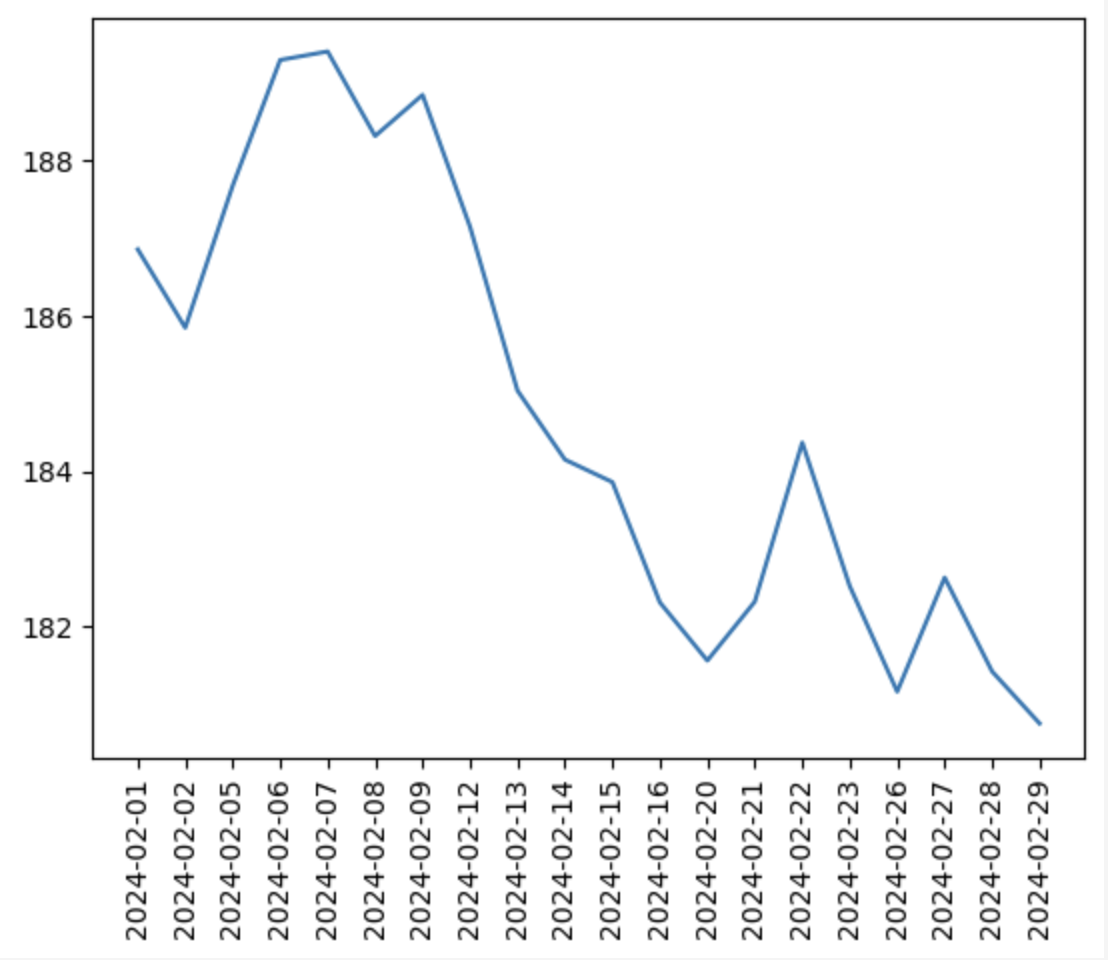

we can know the display from judging the relation of the date

In [16]:
bar_list_new

[('2024-02-02', 185.85, '2024-02-01', 186.86),
 ('2024-02-08', 188.32, '2024-02-09', 188.85),
 ('2024-02-20', 181.56, '2024-02-22', 184.37),
 ('2024-02-26', 181.16, '2024-02-27', 182.63),
 ('2024-02-29', 180.75, '2024-02-07', 189.41)]

In [142]:
def find_parent(bar_list):
    parent = []
    n = len(bar_list)
    for i in range(n):
        if datetime.strptime(bar_list[i][0], '%Y-%m-%d') > datetime.strptime(bar_list[i][2], '%Y-%m-%d'):
            print("left")
            if i == 0:
                parent.append("root")
            else:
                for j in range(i, 0, -1):
                    if bar_list[j][1] < bar_list[i][3] and bar_list[j][3] > bar_list[i][3]:
                        # parent.append((bar_list[j],j))
                        parent.append(str(j))
                        break
                print("[debug]")
                parent.append("root")
        
        else:
            print("right")
            if i == n-1:
                parent.append("root_r")
            else:
                for j in range(i, n, 1):
                    if bar_list[j][1] < bar_list[i][3] and bar_list[j][3] > bar_list[i][3]:
                        # parent.append((bar_list[j],j))
                        parent.append(str(j))
                        break
                parent.append("root")
    #parent.append("root")
    return parent
        

In [79]:
parent = find_parent(bar_list_new)

left
right
right
right
left


In [69]:
def tidy_bars_step2(bar_list_new, parent):
    bar_list_final = []
    for bar, par in zip(bar_list_new, parent):
        bar_list_final.append([par, bar])
    return bar_list_final

In [83]:
def tidy_bars_step2(bar_list_new, parent):
    bar_list_final = []
    for index, (bar, par) in enumerate(zip(bar_list_new, parent)):
        bar_list_final.append([str(index), par, bar])
    return bar_list_final

In [84]:
tidy_bars_step2(bar_list_new, parent)


[['0', 'root', ('2024-02-02', 185.85, '2024-02-01', 186.86)],
 ['1', '4', ('2024-02-08', 188.32, '2024-02-09', 188.85)],
 ['2', '4', ('2024-02-20', 181.56, '2024-02-22', 184.37)],
 ['3', '4', ('2024-02-26', 181.16, '2024-02-27', 182.63)],
 ['4', 'root', ('2024-02-29', 180.75, '2024-02-07', 189.41)]]

In [106]:
def visualize_tree(bar_list):
    tree = Tree()
    tree.create_node('root', 'root')
    n = len(bar_list)
    for bar in bar_list:
        index = bar[0]
        parent = bar[1]
        bar = bar[2]
        tree.create_node(index + str(bar), index, parent = 'root')

    # move each bar to its parent
    for bar in bar_list:
        index = bar[0]
        parent = bar[1]
        bar = bar[2]
        tree.move_node(index, parent)
    tree.show()

In [107]:
bar_list_final = tidy_bars_step2(bar_list_new, parent)
visualize_tree(bar_list_final)

root
├── 0('2024-02-02', 185.85, '2024-02-01', 186.86)
└── 4('2024-02-29', 180.75, '2024-02-07', 189.41)
    ├── 1('2024-02-08', 188.32, '2024-02-09', 188.85)
    ├── 2('2024-02-20', 181.56, '2024-02-22', 184.37)
    └── 3('2024-02-26', 181.16, '2024-02-27', 182.63)



test on other cases

In [108]:
bar_list2 = [(('2024-06-05', 195.87), ('2024-06-06', 194.48)),
 (('2024-06-07', 196.89), ('2024-06-10', 193.12)),
 (('2024-06-13', 214.24), ('2024-06-14', 212.49))]

In [143]:
bar_list2_mid = tidy_bars_step1(bar_list2)
parent2 = find_parent(bar_list2_mid)
bar_list_final2 = tidy_bars_step2(bar_list2_mid, parent2)

left
left
[debug]
left
[debug]


In [144]:
bar_list2_mid

[('2024-06-06', 194.48, '2024-06-05', 195.87),
 ('2024-06-10', 193.12, '2024-06-07', 196.89),
 ('2024-06-14', 212.49, '2024-06-13', 214.24)]

In [145]:
parent2

['root', 'root', 'root']

In [146]:
bar_list_final2

[['0', 'root', ('2024-06-06', 194.48, '2024-06-05', 195.87)],
 ['1', 'root', ('2024-06-10', 193.12, '2024-06-07', 196.89)],
 ['2', 'root', ('2024-06-14', 212.49, '2024-06-13', 214.24)]]

In [147]:
visualize_tree(bar_list_final2)

root
├── 0('2024-06-06', 194.48, '2024-06-05', 195.87)
├── 1('2024-06-10', 193.12, '2024-06-07', 196.89)
└── 2('2024-06-14', 212.49, '2024-06-13', 214.24)

